#Statisics in Python

1. Analyzing Frequency Distribution
2. Mean
3. Mode
4. Median
5. STD
6. Correlation
7. Pairwise
8. Z-scores

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Let's use our pandas skil to create a column labelling quality with either good or bad
But first, let's look the quality scores distribution


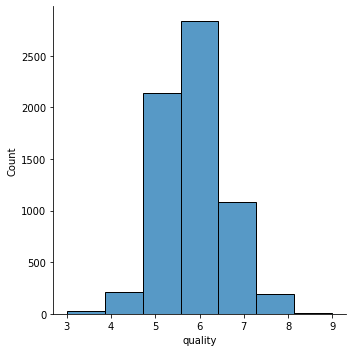

In [ ]:
sns.displot(df['quality'], bins=7, kde= False)

In [ ]:
# Let's use 6 as the threshold for goood

df['rating'] = df['quality'].apply(lambda x: 'good' if x >= 6 else 'bad')
df.head(15)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,good
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,good


# LEt's go back to our plot

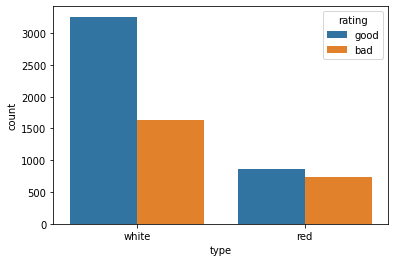

In [ ]:
sns.countplot(x = 'type', hue= 'rating', data= df)

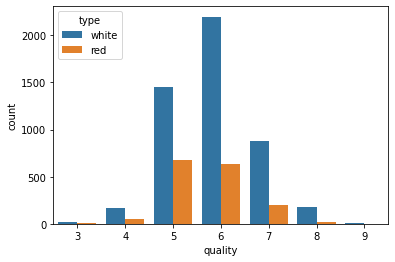

In [ ]:
sns.countplot( x = df.quality, hue='type', data = df)

# Let's compare things a bit more and get a better picure of the difference between red and white usign Boxplots
![alt text](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png)

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'rating'],
      dtype='object')

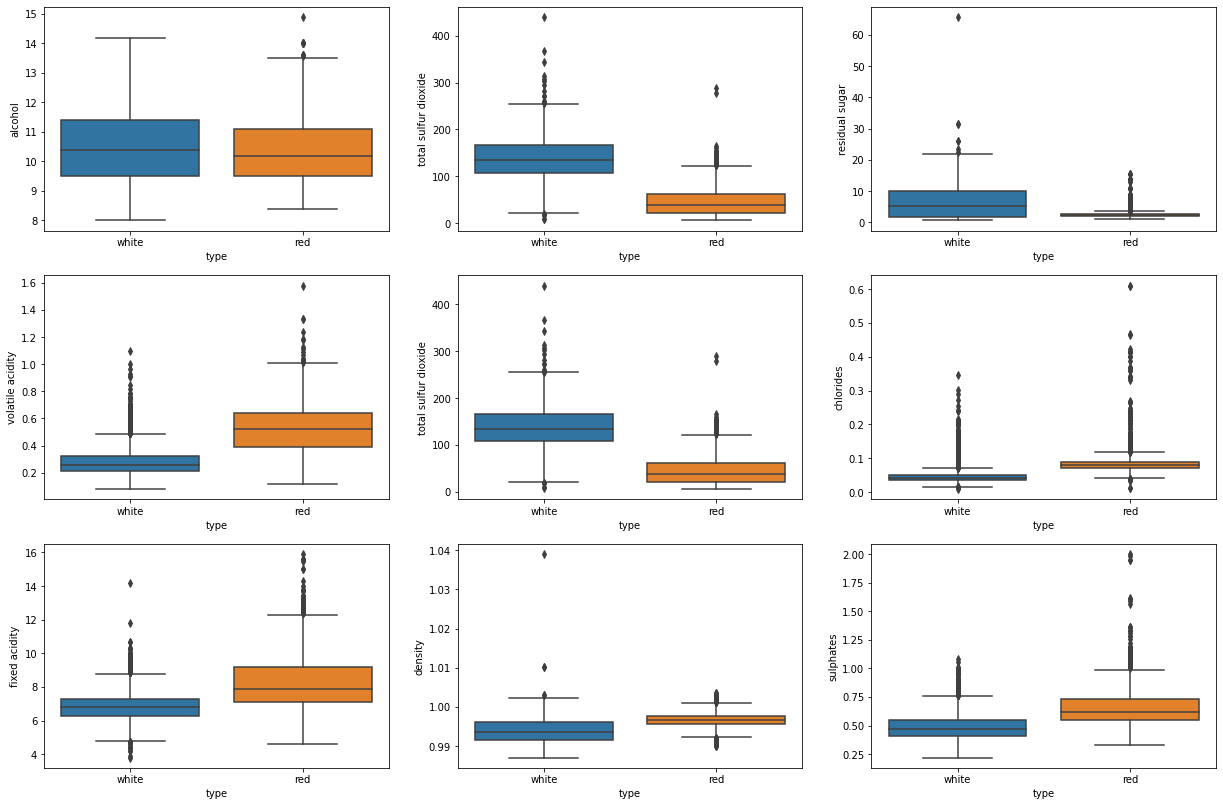

In [ ]:
# Lets define the size of our ploting output (make it big since we're doing 8 plots)
fig = plt.figure(figsize =(21,14))

# Store the feature or columns we're going to plot in a list
features =["alcohol", "total sulfur dioxide", "residual sugar", "volatile acidity", 
            "total sulfur dioxide", "chlorides", "fixed acidity", "density","sulphates"]

# Loop through our features plotting each plot in our loop
for (i, feature) in enumerate(features):
  ax1  = fig.add_subplot(3,3,i+1)
  sns.boxplot(x=df.type, y= feature,data = df)

In [ ]:
df[df["type"] == 'red']['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


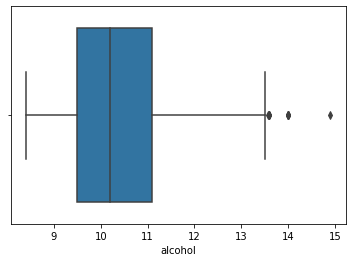

In [ ]:
sns.boxplot(df[df['type'] == 'red']['alcohol'], orient ="v")

# Finding the Mean, Mode and Median


In [ ]:
# Let's load our Titantic dataset
 
file_name ="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/titanic.csv"
df = pd.read_csv(file_name)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
df.describe()


,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
# Let's make a simple function  you can use to return the mode

def getMode(dataset, feature):
  return dataset[feature].value_counts().index[0]

getMode(df, 'pclass')

3

In [ ]:
getMode(df, 'sex')

'male'

In [ ]:
getMode(df, 'age')

24.0

# Finding the Mean

In [ ]:
# Note only works for numeric data

df.median()

pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
survived     0.0000
dtype: float64

# Getting the Mean,Median, and Mode


In [ ]:
print('Mean = ' + str(df['age'].mean()))
print('Median = ' + str(df['age'].median()))
print('Mode = ' + str(getMode(df,'age')))

Mean = 29.8811345124283
Median = 28.0
Mode = 24.0


# Standard Deviation


In [4]:
# Load data

file_name =  "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


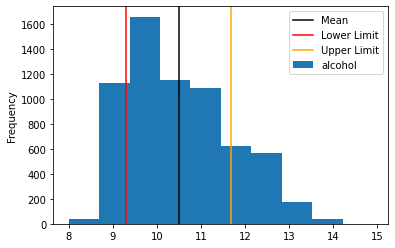

In [ ]:
mean = df['alcohol'].mean()
st_dev = df['alcohol'].std()
df['alcohol'].plot.hist()
plt.axvline(mean, color='black', label= 'Mean')
plt.axvline(mean - st_dev, color = 'red', label = 'Lower Limit')
plt.axvline(mean + st_dev, color = 'orange', label = 'Upper Limit')
plt.legend()


1.4225613158900883
10.491800831149511


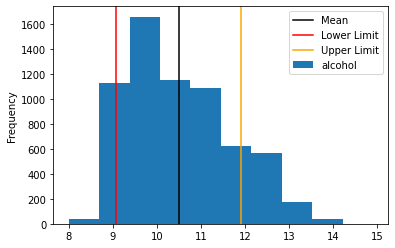

In [ ]:
mean = df['alcohol'].mean()
variance = df['alcohol'].var()
df['alcohol'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - variance, color = 'Red', label = 'Lower Limit')
plt.axvline(mean + variance, color = 'Orange', label = 'Upper Limit')
plt.legend()
print(variance)
print(mean)

# Correlation Matrix

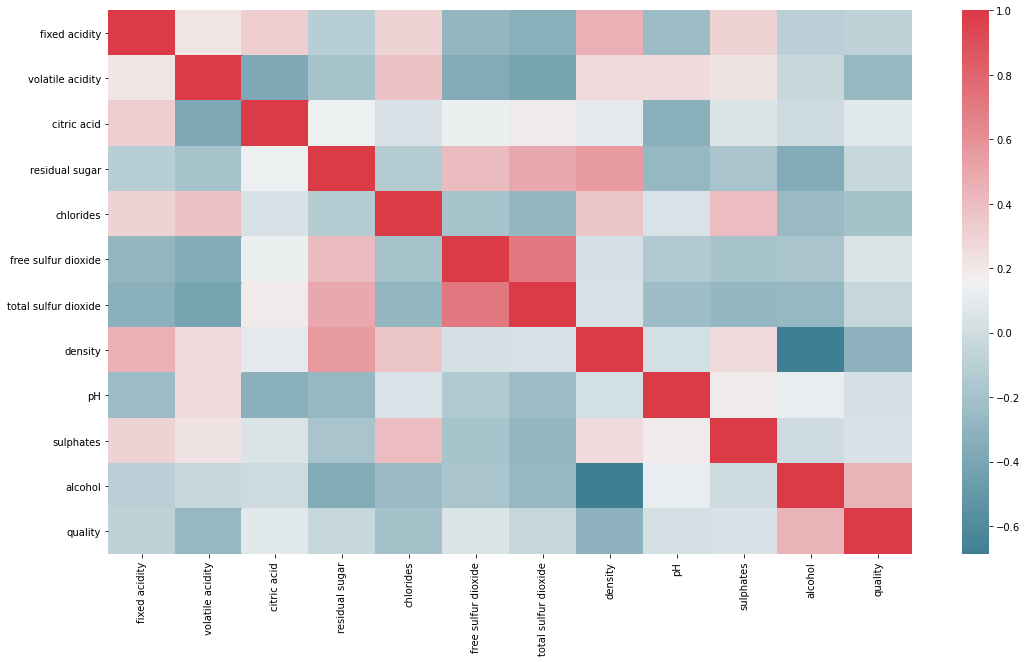

In [ ]:
# Calculation correlation

corr = df.corr()

# Heatmap
plt.figure(figsize =(18,10))
sns.heatmap(data=corr, cmap=sns.diverging_palette(220,10, as_cmap=True))

# Pairwise Plots - Show the scatter plots between all features in our dataset

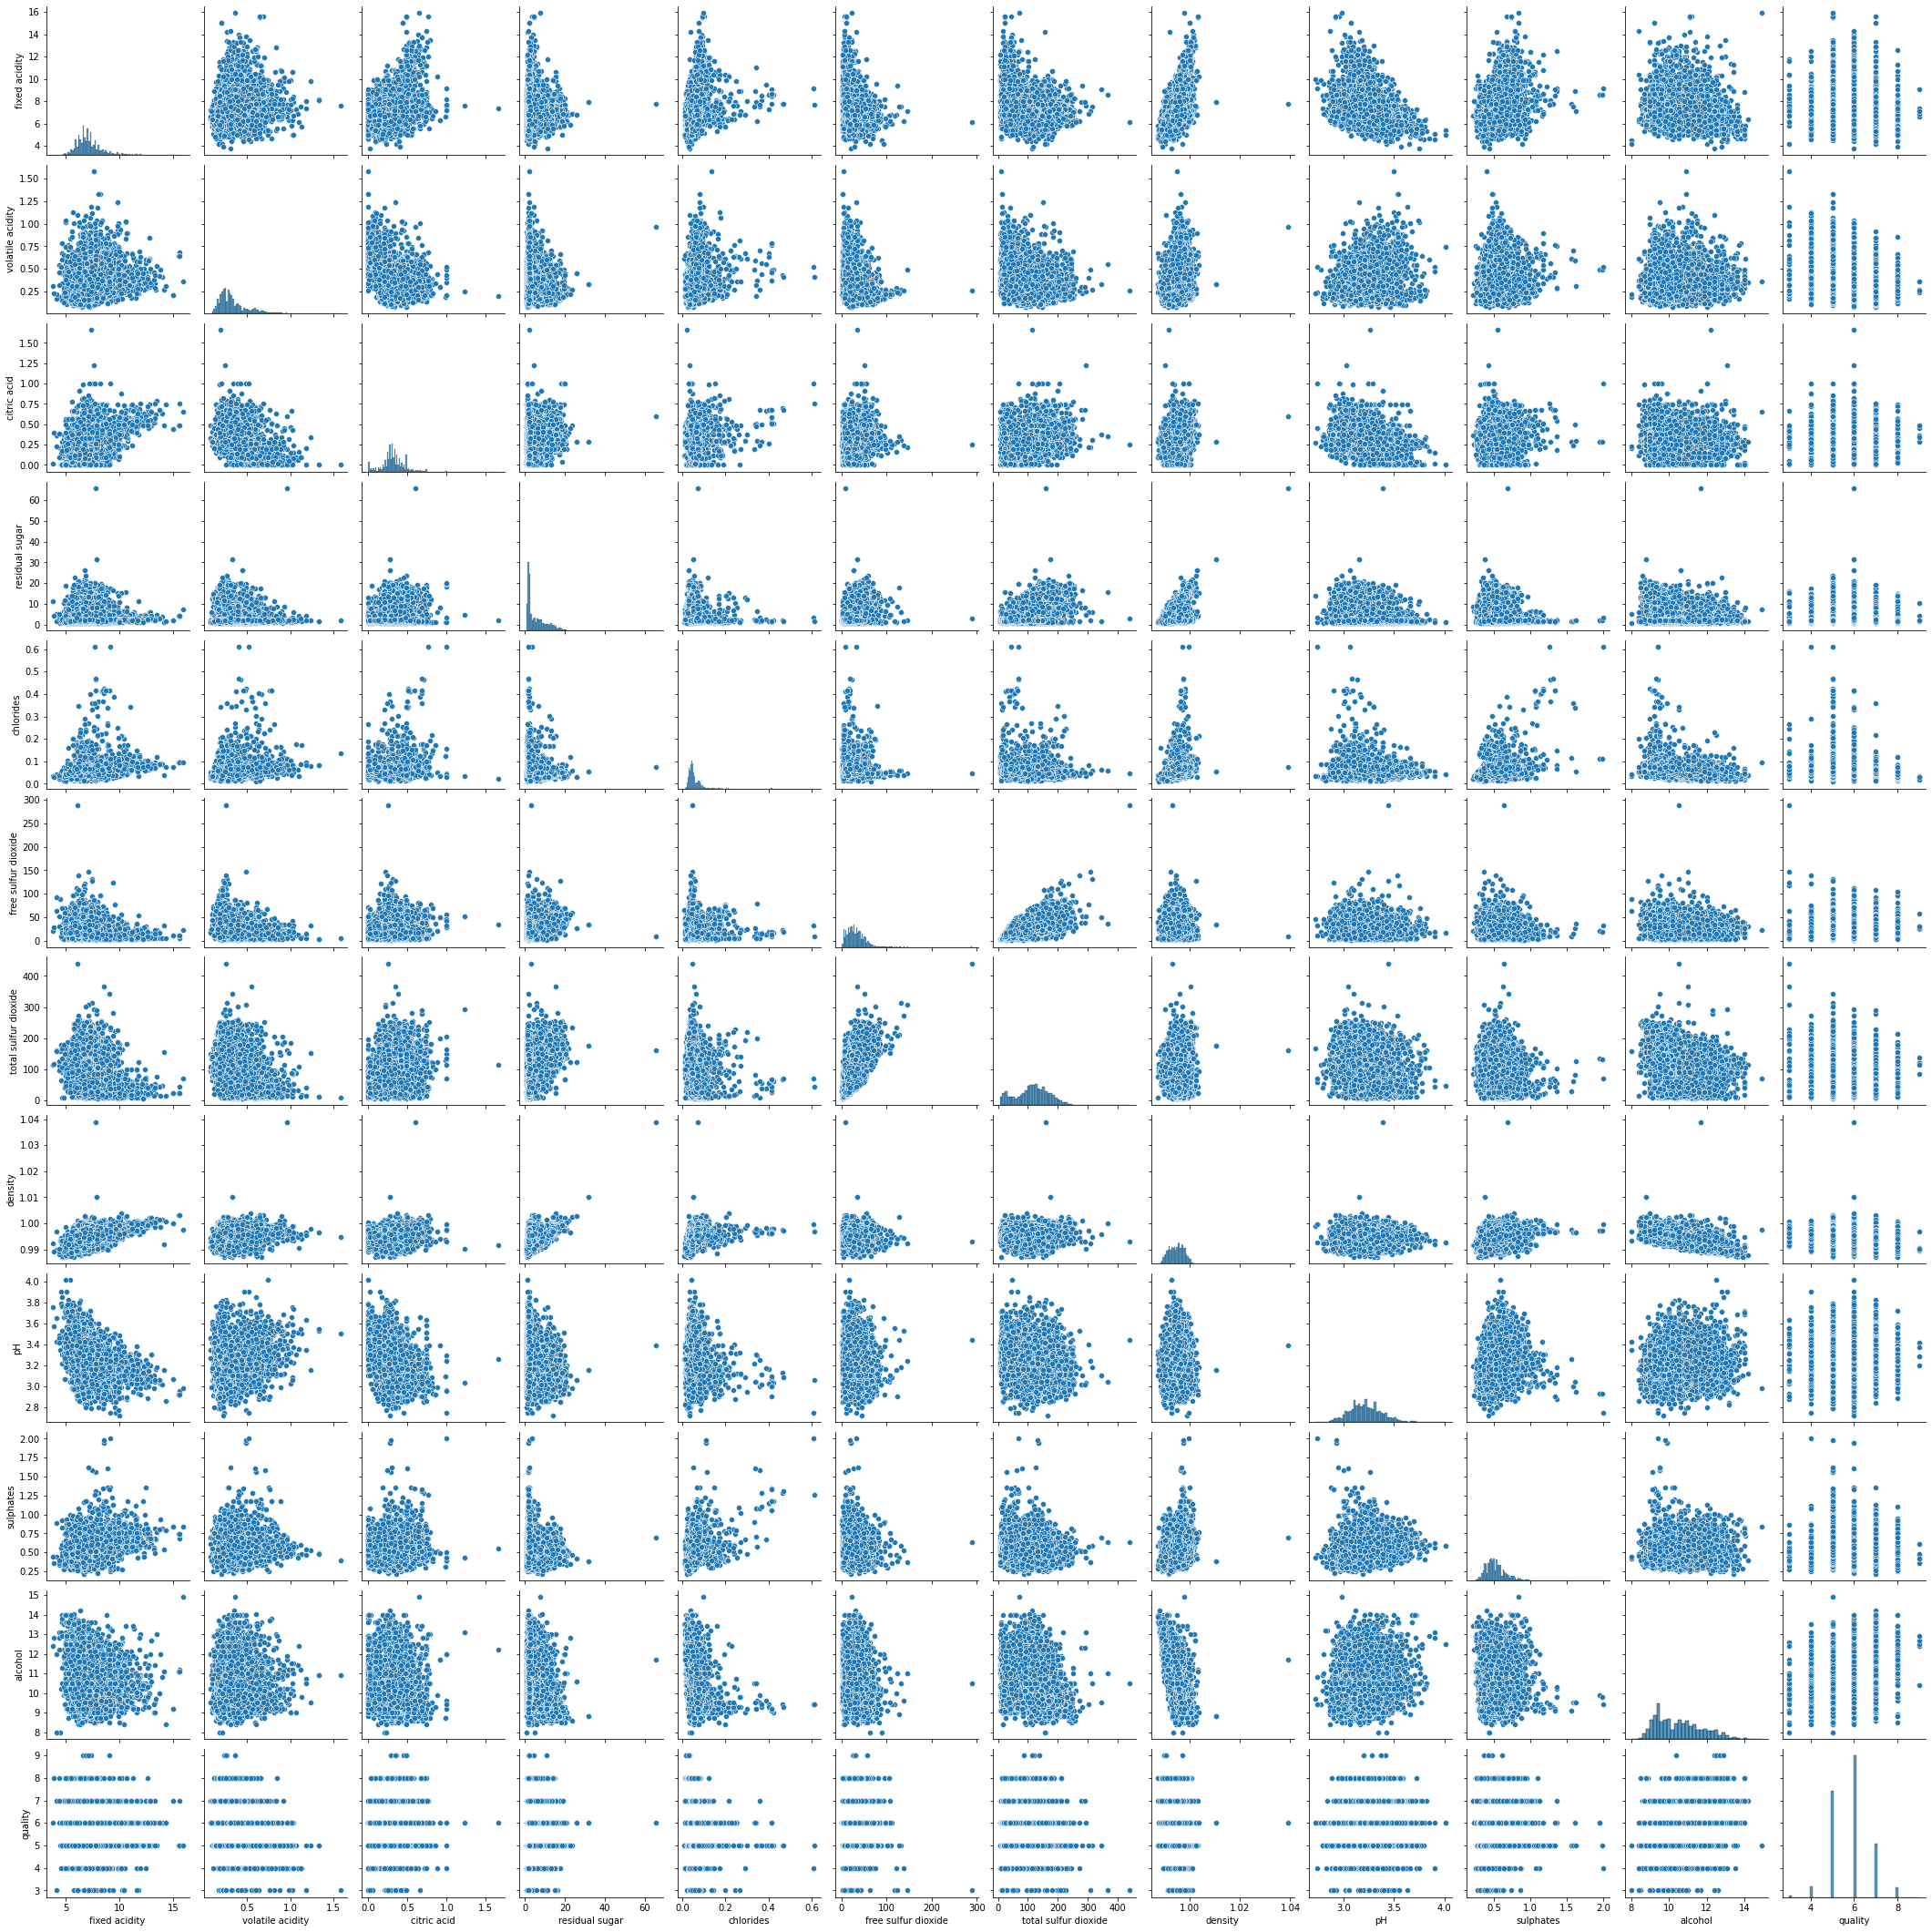

In [ ]:
# Basic pair wise plot

g = sns.pairplot(df)

In [ ]:
g = sns.pairplot(df, palette= 'husl', diag_kind= 'kde', hue= 'type')

Output hidden; open in https://colab.research.google.com to view.

In [5]:
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Z-Scores

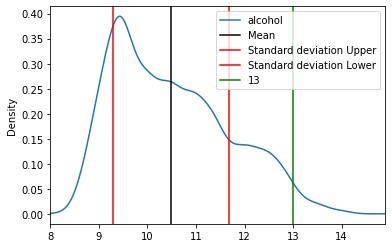

In [6]:
# First let's look at the Standard Deviation of our Alcohol Data
import pandas as pd
import matplotlib.pyplot as plt

df['alcohol'].plot.kde(xlim = (df['alcohol'].min(), df['alcohol'].max()))

std = df['alcohol'].std(ddof = 0) # Meaning we divide by N and not (N-1)
mean = df['alcohol'].mean()

plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean + std, color = 'Red', label = 'Standard deviation Upper')
plt.axvline(mean - std, color = 'Red', label = 'Standard deviation Lower')
plt.axvline(13, color = 'Green', label = '13')
plt.legend()

# Converting an entire distribution to its z-scores

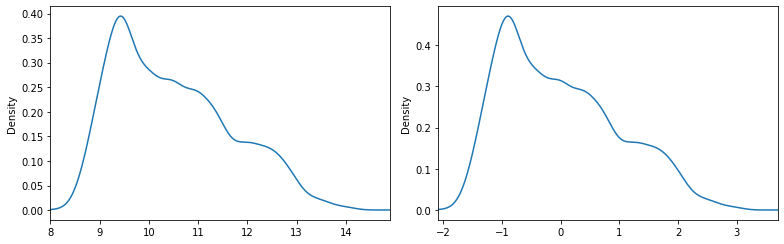

In [11]:
mean = df['alcohol'].mean()
std = df['alcohol'].std(ddof=0)
df['z_scores'] = df['alcohol'].apply(lambda x: ((x-mean)/std))

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
df['alcohol'].plot.kde(xlim = (df['alcohol'].min(), df['alcohol'].max()))

plt.subplot(1,2,2)
df['z_scores'].plot.kde(xlim = (df['z_scores'].min(), df['z_scores'].max()))

plt.tight_layout () # Otherwise the plots will overlay partially